In [11]:
from pydataset import data
import pandas as pd
from sklearn.preprocessing import scale

%matplotlib inline
import matplotlib.pyplot as plt

mtcars = data('mtcars')
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [15]:
plt.rc('figure', figsize=(11, 11))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


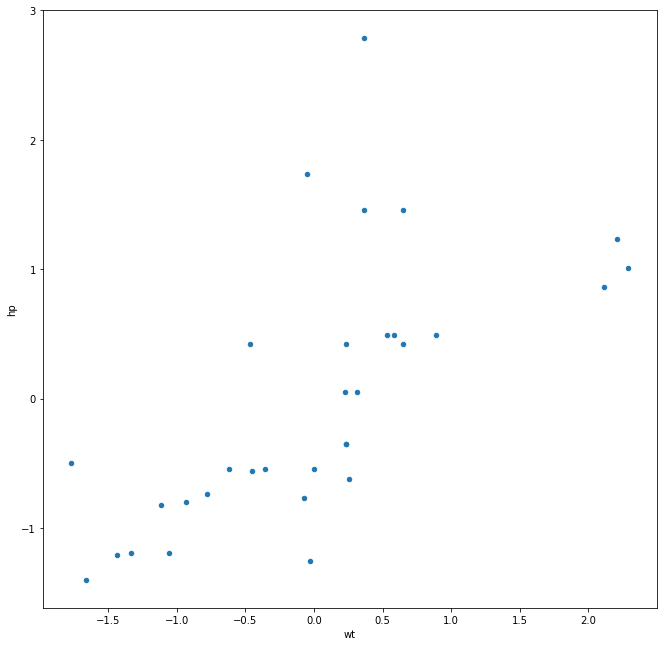

In [17]:
X = pd.DataFrame(scale(mtcars[['hp', 'wt']]), columns=['hp', 'wt'])
X.plot.scatter(y='hp', x='wt')

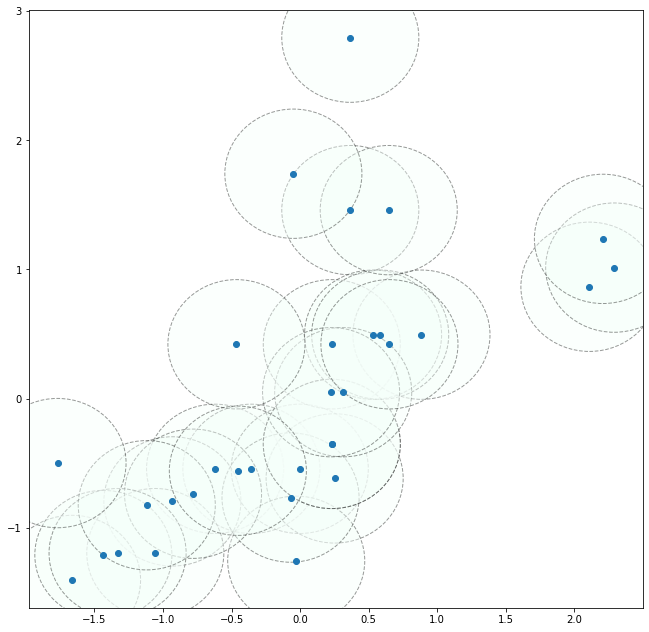

In [20]:
eps = .5

plt.scatter(X.wt, X.hp, zorder=3)
for i, p in X.iterrows():
    circle = plt.Circle((p.wt, p.hp), .5, fc='mintcream', edgecolor='black', ls='--', alpha=.4, zorder=-1)
    plt.gca().add_patch(circle)
    

In [21]:
from sklearn.cluster import dbscan

In [25]:
eps = .5
minPts = 3

cores, labels = dbscan(X, eps=eps, min_samples=minPts)
X['cluster'] = labels
X

,hp,wt,cluster
0,-0.543655,-0.620167,0
1,-0.543655,-0.355382,0
2,-0.795570,-0.931678,0
3,-0.543655,-0.002336,0
4,0.419550,0.231297,0
5,-0.617748,0.252064,0
6,1.456847,0.366285,-1
7,-1.254944,-0.028296,0
8,-0.765933,-0.069830,0
9,-0.351014,0.231297,0


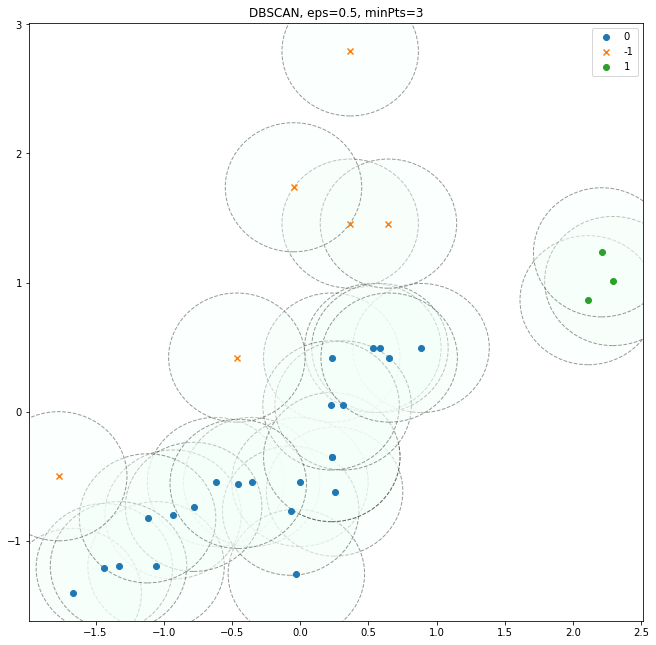

In [29]:
eps = .5
minPts = 3

cores, labels = dbscan(X, eps=eps, min_samples=minPts)
X['cluster'] = labels

for c in X.cluster.unique():
    subset = X[X.cluster == c]
    marker = 'x' if c == -1 else 'o'
    plt.scatter(subset.wt, subset.hp, marker=marker, label=c, zorder=3)
    
for i, p in X.iterrows():
    circle = plt.Circle((p.wt, p.hp), eps, fc='mintcream', edgecolor='black', ls='--', alpha=.4, zorder=-1)
    plt.gca().add_patch(circle)

plt.title(f'DBSCAN, eps={eps}, minPts={minPts}')
plt.legend()

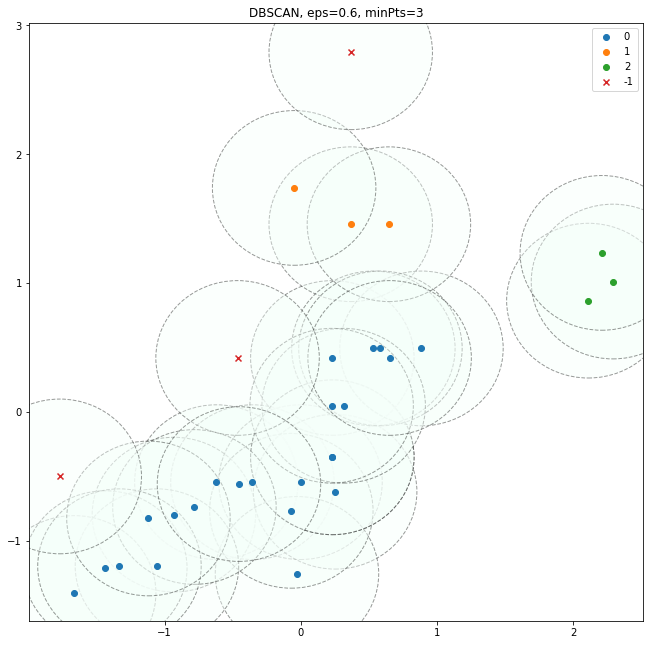

In [30]:
eps = .6
minPts = 3

cores, labels = dbscan(X, eps=eps, min_samples=minPts)
X['cluster'] = labels

for c in X.cluster.unique():
    subset = X[X.cluster == c]
    marker = 'x' if c == -1 else 'o'
    plt.scatter(subset.wt, subset.hp, marker=marker, label=c, zorder=3)
    
for i, p in X.iterrows():
    circle = plt.Circle((p.wt, p.hp), eps, fc='mintcream', edgecolor='black', ls='--', alpha=.4, zorder=-1)
    plt.gca().add_patch(circle)

plt.title(f'DBSCAN, eps={eps}, minPts={minPts}')
plt.legend()

In [35]:
def plot_dbscan(eps, minPts):
    cores, labels = dbscan(X, eps=eps, min_samples=minPts)
    X['cluster'] = labels

    for c in X.cluster.unique():
        subset = X[X.cluster == c]
        marker = 'x' if c == -1 else 'o'
        plt.scatter(subset.wt, subset.hp, marker=marker, label=c, zorder=3)

    for i, p in X.iterrows():
        circle = plt.Circle((p.wt, p.hp), eps, fc='mintcream', edgecolor='black', ls='--', alpha=.4, zorder=-1)
        plt.gca().add_patch(circle)

    plt.title(f'DBSCAN, eps={eps}, minPts={minPts}')
    plt.legend()

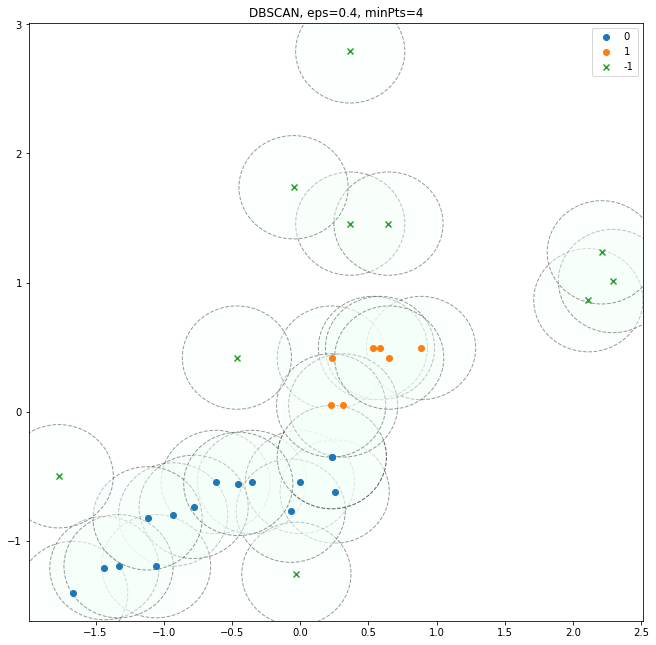

In [37]:
plot_dbscan(.4, 4)

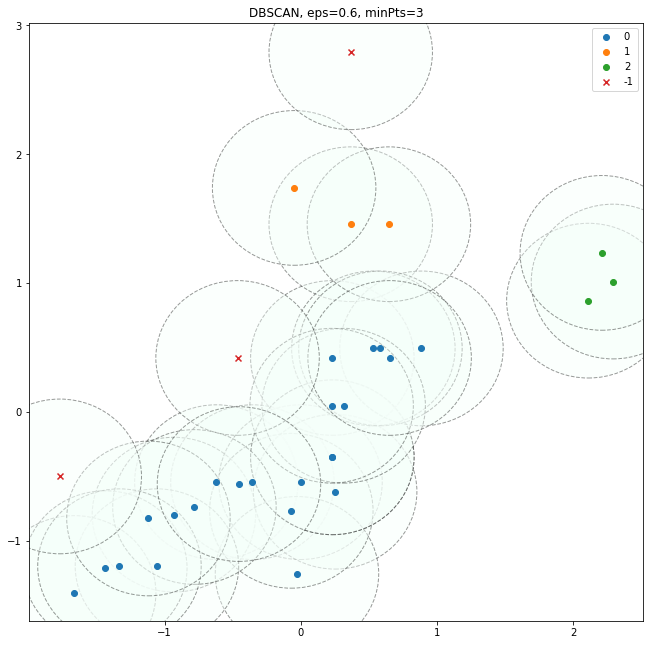

In [44]:
plot_dbscan(.6, 3)

In [47]:
def f(x):
    return x * 2

interact(f, x=3)

interactive(children=(IntSlider(value=3, description='x', max=9, min=-3), Output()), _dom_classes=('widget-int…

<function __main__.f(x)>

In [46]:
from ipywidgets import interact

interact(plot_dbscan, eps=.5, minPts=3)

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.5, min=-0.5), IntSlider(value=3, descrip…

<function __main__.plot_dbscan(eps, minPts)>